In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow_probability as tfp

from training import create_models
from models import Model, DefaultDenseModel, DefaultConvModel, McDropoutModel, BayesByBackpropModel
import commons

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


In [7]:
trainingset_proportion = 0.5
embedding_dim = 50
batch_size = 128
epochs = 50

glove_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/glove"
history_evaluation_folder = "D:/google drive/haw/master/mastertheisis/hauptprojekt/evaluation/history/"
models_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/models"
history_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/history"

setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      trainingset_proportion=trainingset_proportion)
models = create_models(setup, models_dir, history_dir)

Found 400000 word vectors.
17361/88587 unknown words


Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


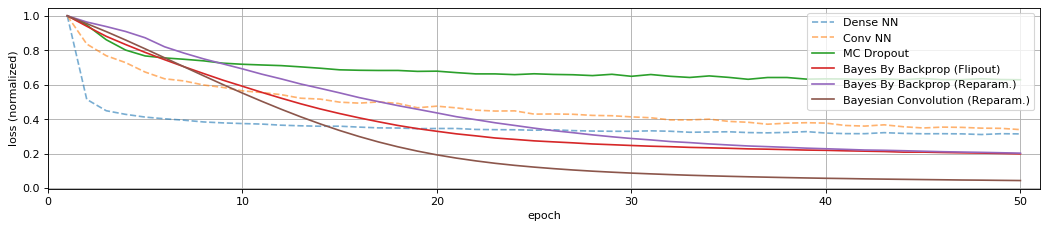

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


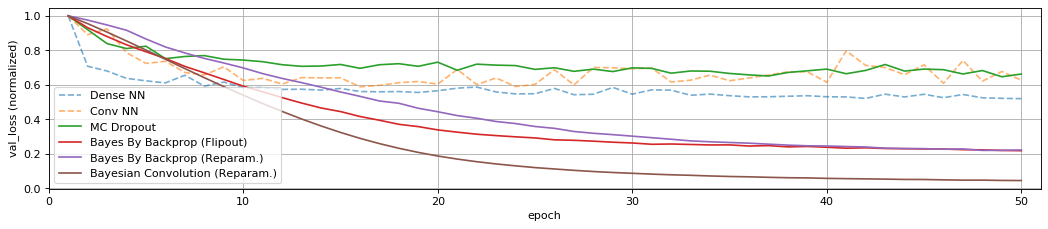

using saved model
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


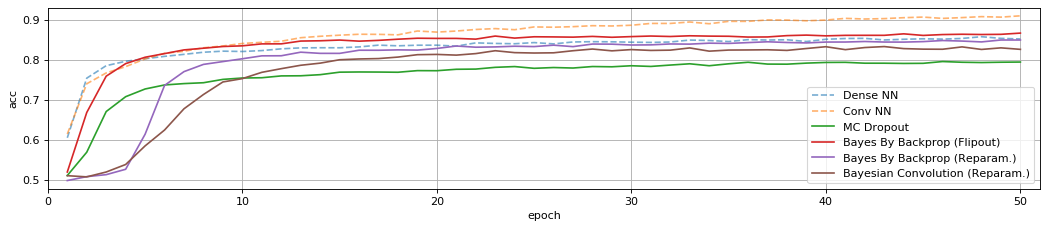

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


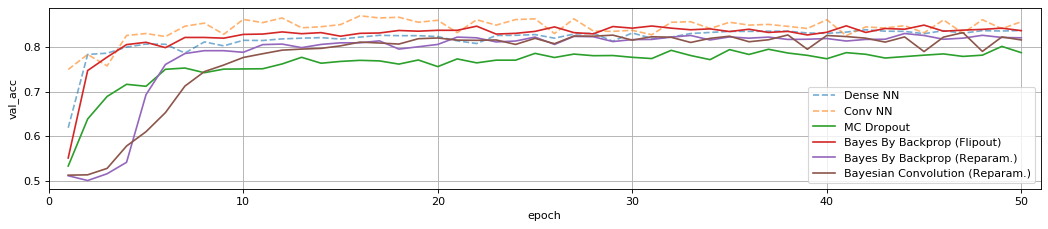

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


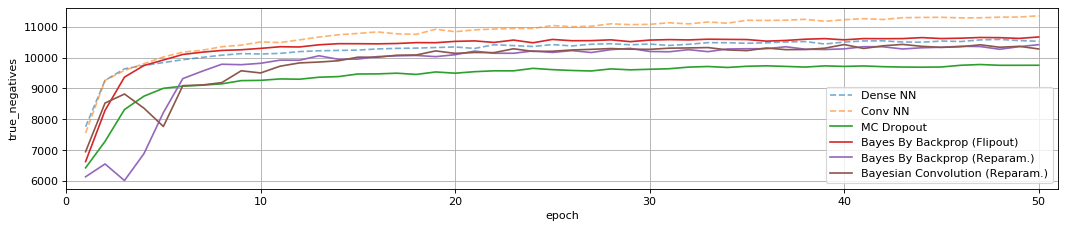

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


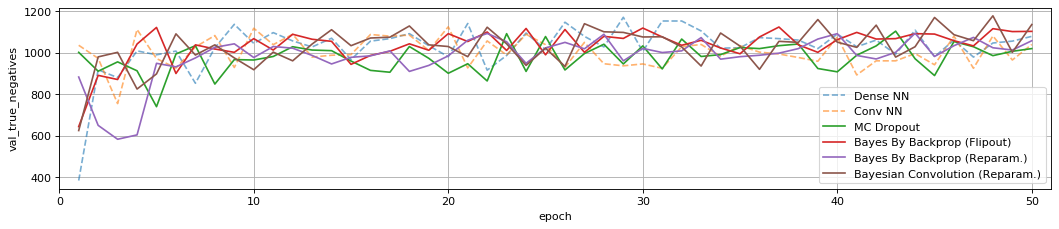

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


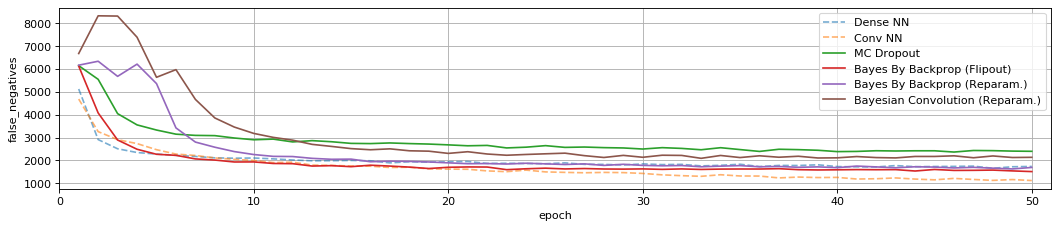

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


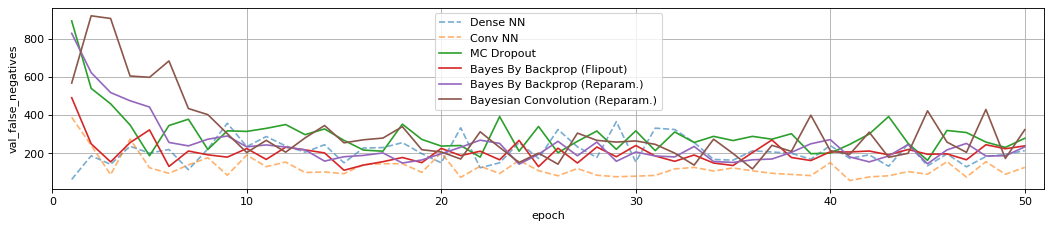

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


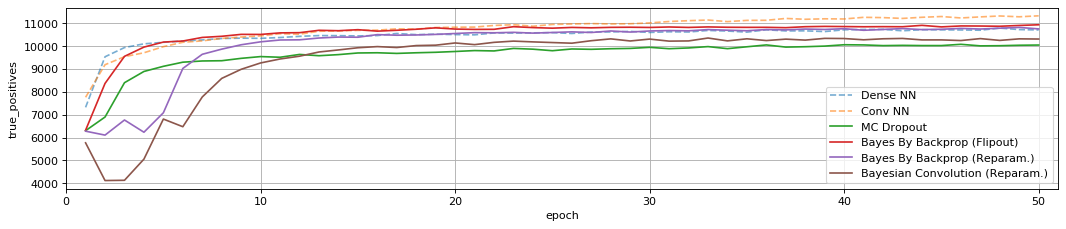

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


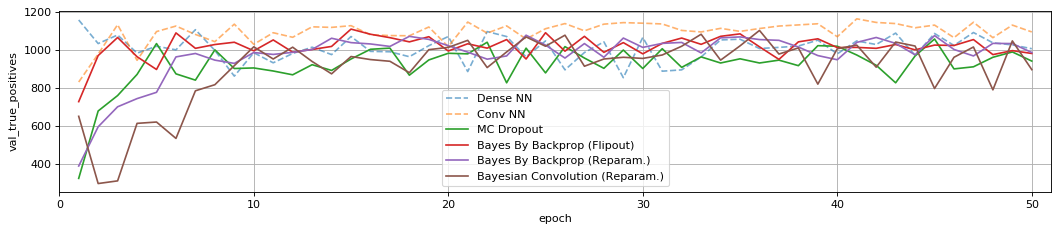

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


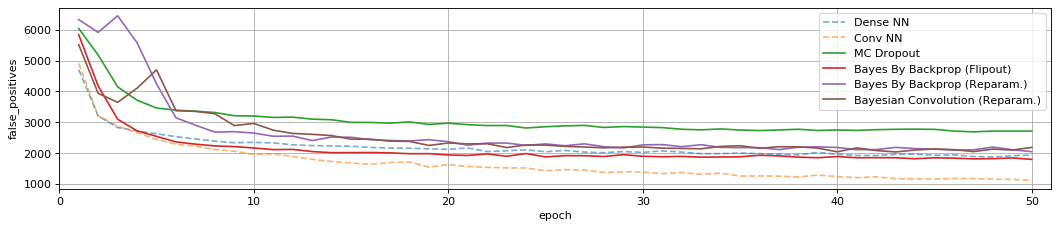

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


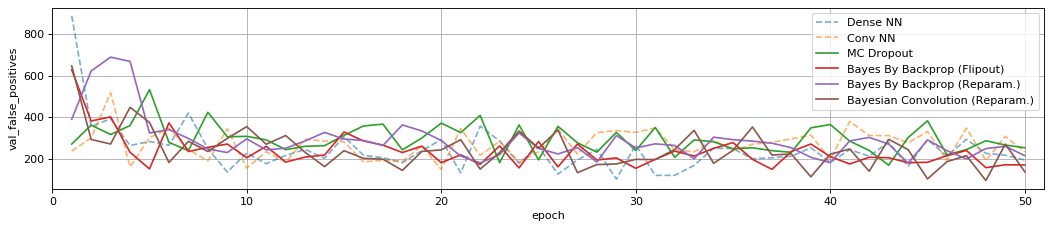

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


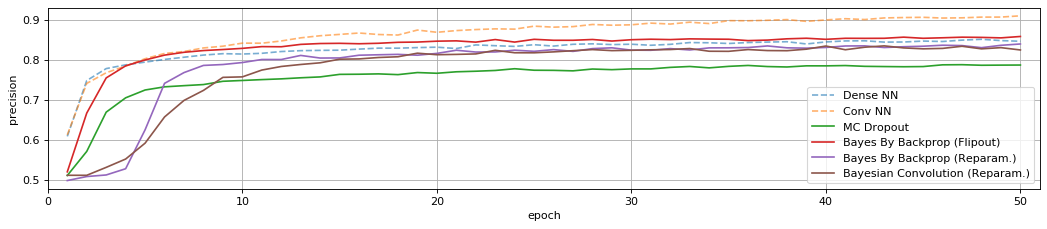

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


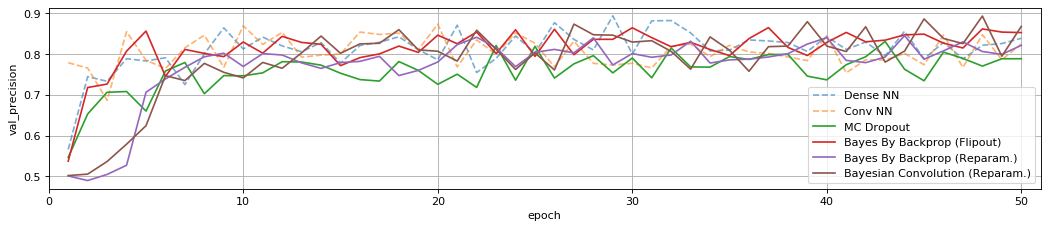

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


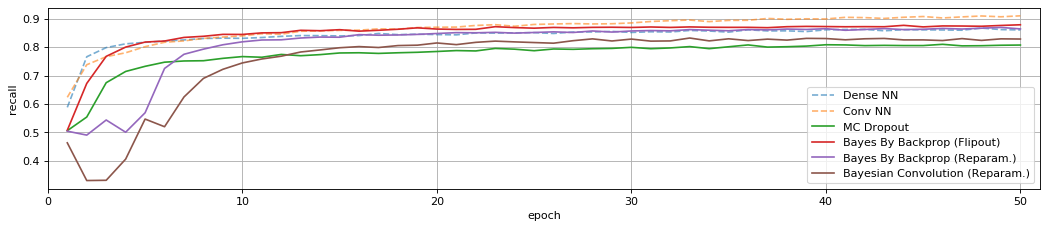

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


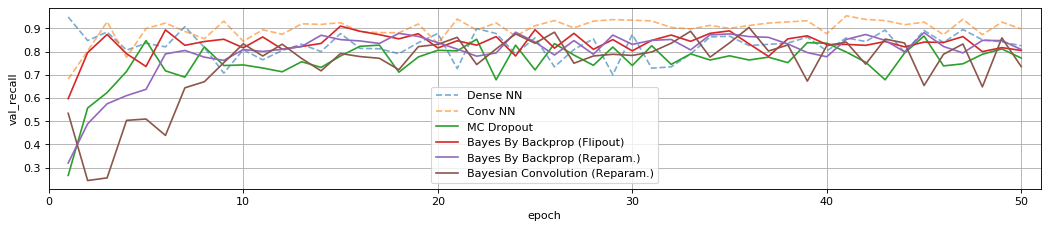

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


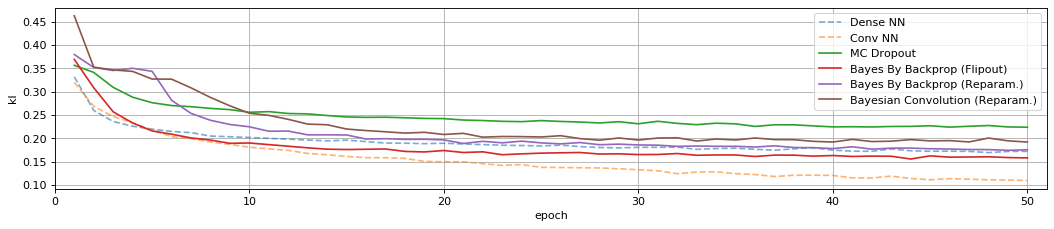

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


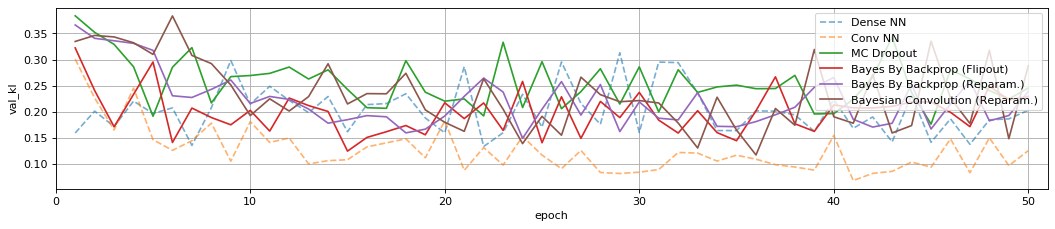

In [8]:
# evaluate history
def plot_metric(col_name, is_training=True, normalize=False):
    figure(num=None, figsize=(16, 3), dpi=80)

    for model in models:
        (history, last_epoch) = model.load_history()
        y_label = col_name

        if is_training:
            col = col_name
        else:
            col = "val_%s" % col_name
            y_label = col

        if normalize:
            norm_factor = 1./np.max(history[col][:50])
            y_label += (" (normalized)")
        else:
            norm_factor = 1.
            
        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        plt.plot(np.arange(1, epochs + 1, 1), history[col][:50] * norm_factor, alpha=alpha, linestyle=linestyle)


    plt.legend([model.readable_name() for model in models])
    plt.xlabel("epoch")
    plt.ylabel(y_label)
    plt.xlim([0, epochs + 1])
    plt.grid()
    plt.savefig(history_evaluation_folder + str(int(models[0].N)) + "_" + col + ".pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()


plot_metric("loss", True, normalize=True)
plot_metric("loss", False, normalize=True)

metric_names = list(filter(lambda m: m is not "loss" and m is not "val_loss", models[0].load_model().metrics_names))
for metric in metric_names:
    plot_metric(metric, True)
    plot_metric(metric, False)


In [4]:
metric_names = list(map(lambda metric: "val_%s" % metric, models[0].load_model().metrics_names))
dataset_sizes=[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.005]
Nx = []
Ny_histories = []
for dataset_size in dataset_sizes:
    setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      trainingset_proportion=dataset_size)
    models = create_models(setup, models_dir, history_dir)
    
    Nx += [models[0].N]
    Ny_histories += [[model.load_history()[0] for model in models]]

W0630 20:17:25.995828  8556 deprecation.py:323] From C:\Users\Tom\Anaconda3\envs\mltf2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


using saved model
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
1736

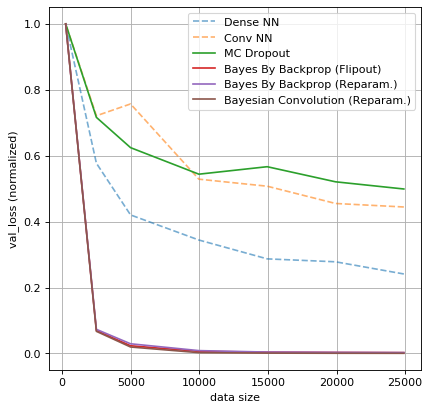

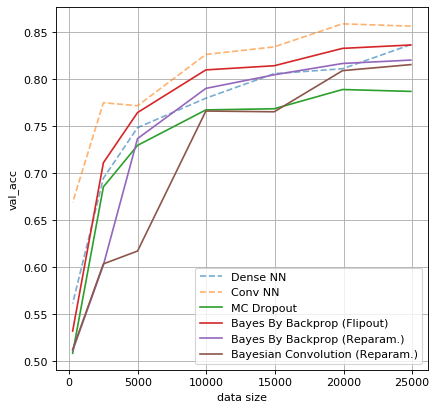

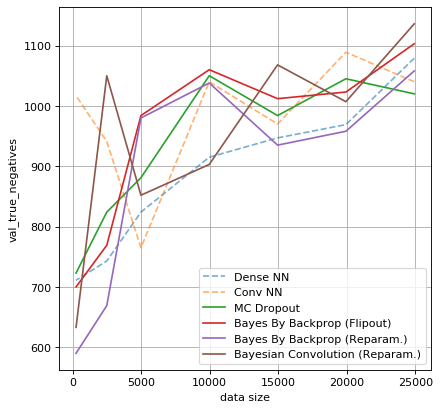

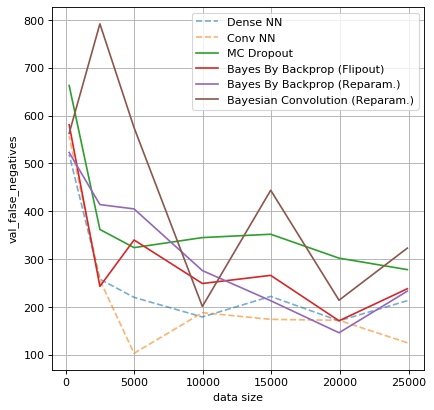

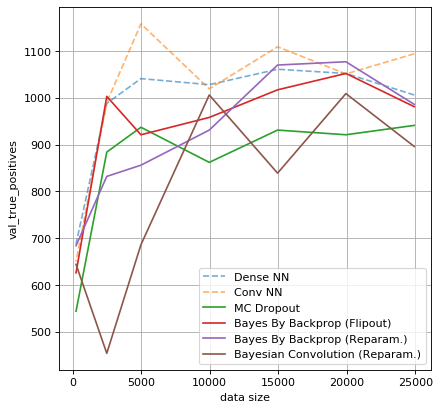

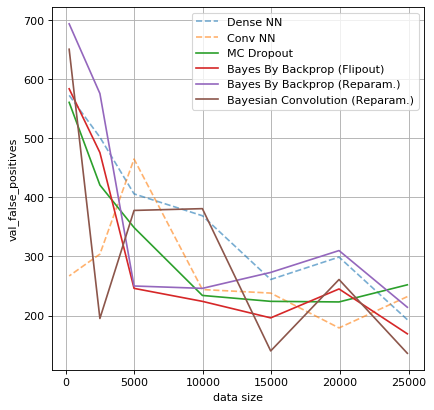

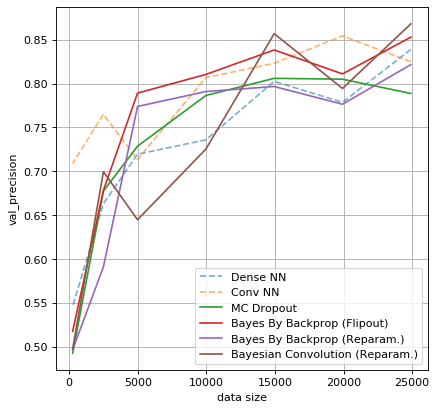

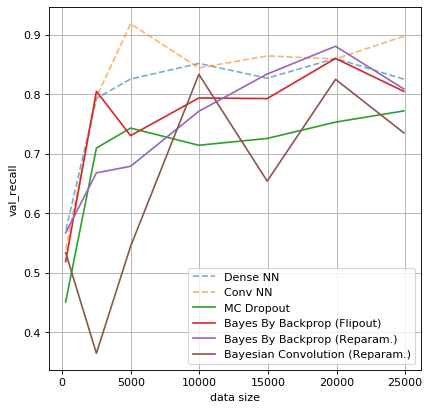

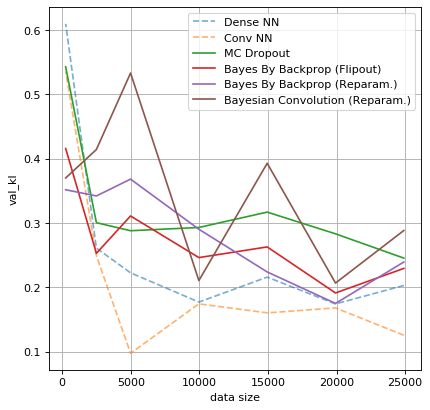

In [5]:
for metric in metric_names:
    figure(num=None, figsize=(6, 6), dpi=80)
    
    for m in range(len(models)):
        model = models[m]
        y_label = metric

        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        norm_factor = 1.
        Ny = []
        for history in Ny_histories:
            col = history[m][metric]
            Ny += [col.iloc[-1]]
            
        if metric == "loss" or metric == "val_loss":
            norm_factor = 1./np.max(Ny)
        plt.plot(Nx, np.array(Ny) * norm_factor, alpha=alpha, linestyle=linestyle)   
        
    if metric == "loss" or metric == "val_loss":
        y_label += (" (normalized)")
        
    plt.legend([model.readable_name() for model in models])
    plt.xlabel("data size")
    plt.ylabel(y_label)
    plt.grid()
    plt.savefig(history_evaluation_folder + metric + "_varrying_n" + ".pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [24]:
# testing all models
samples = 5
for model in models[2:]:
    print(model.readable_name())
    (x_test, x_test_padded, y_test) = model.testing_data
    loaded_model = model.load_model()
    evaluation = np.array([loaded_model.evaluate(x_test_padded, y_test) for i in range(samples)])
    means = np.mean(evaluation, axis=0)
    stds = np.std(evaluation, axis=0)

    (loss_m, acc_m, true_negatives_m, false_negatives_m, true_positives_m, false_positives_m, precision_m, recall_m, kl_m) = means
    (loss_std, acc_std, true_negatives_std, false_negatives_std, true_positives_std, false_positives_std, precision_std, recall_std, kl_std) = stds
    
    print("\n----")
    print(model.readable_name())
    print("Accuracy: %.3f +- %.3f" % (acc_m, acc_std * 2))   
    print("Precision: %.3f +- %.3f" % (precision_m, precision_std * 2))    
    print("Recall: %.3f +- %.3f" % (recall_m, recall_std * 2))

using saved model
22419/22419 [==============================] - 13s 584us/sample - loss: 0.4698 - acc: 0.8255 - true_negatives: 9231.0000 - false_negatives: 1965.0000 - true_positives: 9276.0000 - false_positives: 1947.0000 - precision: 0.8265 - recall: 0.8252 - kl: 0.2162

----
Dense NN
Accuracy: 0.826
Precision: 0.827
Recall: 0.825
using saved model
22419/22419 [==============================] - 14s 607us/sample - loss: 0.3410 - acc: 0.8501 - true_negatives: 9110.0000 - false_negatives: 1292.0000 - true_positives: 9949.0000 - false_positives: 2068.0000 - precision: 0.8279 - recall: 0.8851 - kl: 0.1374

----
Conv NN
Accuracy: 0.850
Precision: 0.828
Recall: 0.885
using saved model
22419/22419 [==============================] - 13s 562us/sample - loss: 0.4805 - acc: 0.7773 - true_negatives: 8440.0000 - false_negatives: 2255.0000 - true_positives: 8986.0000 - false_positives: 2738.0000 - precision: 0.7665 - recall: 0.7994 - kl: 0.2324

----
MC Dropout
Accuracy: 0.777
Precision: 0.766
Re